In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.control.control_plots import matplotlib

# Simple Linear Regression 📈

In this notebook I'm going to try to implement from scratch the most known and maybe used machine learning model: Univariate Linear regression or simple linear regression.

## Notation

**X**: Input data from the source (example: Square feet of a house, number of rooms, number of bathrooms, etc.)

**y**: Output or the expected values (example: Total price of a house)

**w**: Weight or coefficient: Parameter that we can update, it controls the slope of the line that we want to fit in the data

**b**: bias or intercept: Indicates the y-axis position of the line

**$\hat{y}$**: Predicted value using the model

The equation for a linear regression is the following:

$$
 \hat{y} = w*X+b
$$

## What's linear Regression?

Let's see with one example. 

**Temperature of electronic devices ($X$) vs Lifetime in Hours ($y$)**

In [3]:
# We define the data
X = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]) # Temperature (Celsius)
y = np.array([420, 365, 285, 220, 176, 117, 69, 34, 5]) # Lifetime (Hours)

This data represents the hours of lifetime of electronic devices based on the temperature at which they are used.It's very clear that, increasing the temperature may decrease the lifetime of the device. Our goal is to create a model that can predict the lifetime based only in the temperature feature.

Let's plot to have a better view of the data.

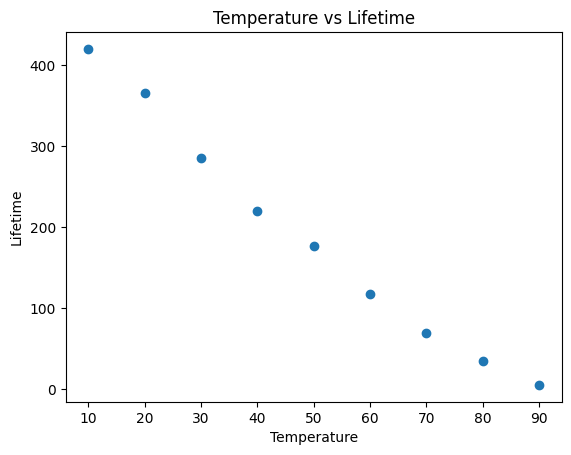

In [4]:
plt.scatter(X, y)
plt.title("Temperature vs Lifetime")
plt.xlabel("Temperature")
plt.ylabel("Lifetime")
plt.show()

Ok, this is very simple dataset, is not very difficult to predict what the lifetime would be if the temperature is 5 or 100, but it's easy enough to create a simple model.

So, the main idea is to have a line that fit the most to this data points.

Something like this

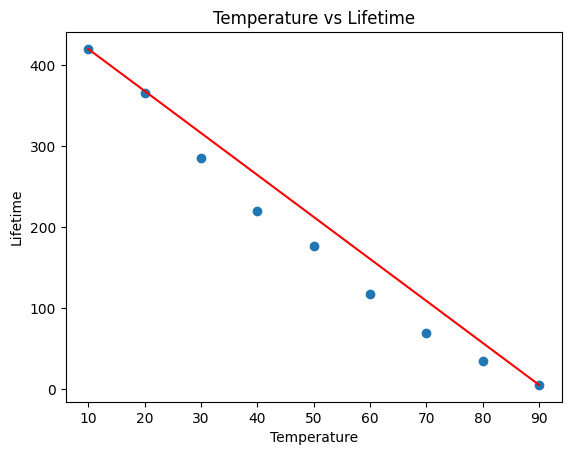

In [5]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.set_title("Temperature vs Lifetime")
ax.set_xlabel("Temperature")
ax.set_ylabel("Lifetime")
plt.plot([90,10], [5,420], label='Line', color='red') 
plt.show()

What values for w or b can create this line? Feel free to modify the following cell and test different values

[418. 366. 314. 262. 210. 158. 106.  54.   2.]


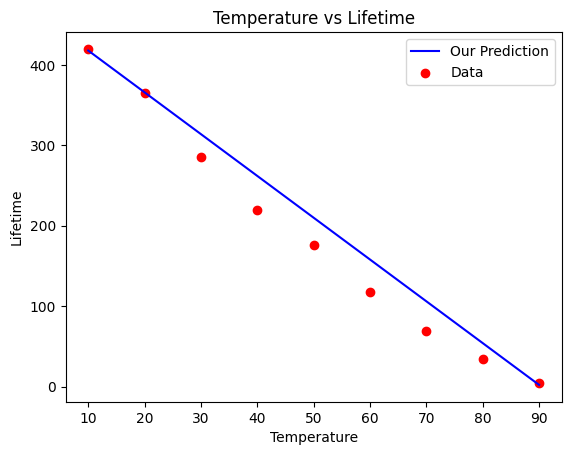

In [6]:
w = -5.2
b = 470

m = X.shape[0]
y_pred = np.zeros(len(X))

for i in range(len(X)):
   y_pred[i] = w * X[i] + b
    
print(y_pred)

plt.plot(X, y_pred, c='b',label='Our Prediction')
plt.scatter(X, y, c='r', label='Data')
plt.title("Temperature vs Lifetime")
plt.xlabel("Temperature")
plt.ylabel("Lifetime")
plt.legend()
plt.show()


## The cost function

To be continued
